In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

In [198]:
EPOCHS = 500

In [199]:
def relu(x):
    return np.maximum(0, x)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def neural_network(X, y, learning_rate, activation_function):
   W1 = np.zeros((2, 1))
   b1 = np.zeros((1,))

   for _ in range(EPOCHS):
       output = activation_function(X @ W1 + b1)
       error = (y - output)
       delta1 = error * (output * (1 - output))
       W1 += learning_rate * X.T @ delta1
       b1 += learning_rate * np.sum(delta1, axis=0)
       
   return {
      "output": np.round(output).flatten(),
      "W1": W1,
      "b1": b1
  }



In [200]:
import matplotlib.pyplot as plt
from functools import partial


def nn_predict(W1, X):
   return np.round(sigmoid(X @ W1)).flatten()


def visualize_results(X, y, result, title):
  h = .02 # step size in the mesh
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = nn_predict(result['W1'], np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
  plt.title(title)
  plt.show()


In [201]:
def get_df(X, y, preds):
    df = pd.DataFrame(X, columns=['input1', 'input2'])
    df['actual'] = y
    df['predicted'] = preds
    return df.astype(int)

In [202]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

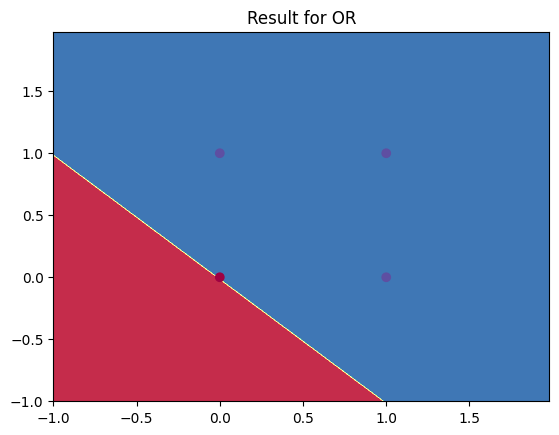

Truth Table
   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       1          1
2       1       0       1          1
3       1       1       1          1


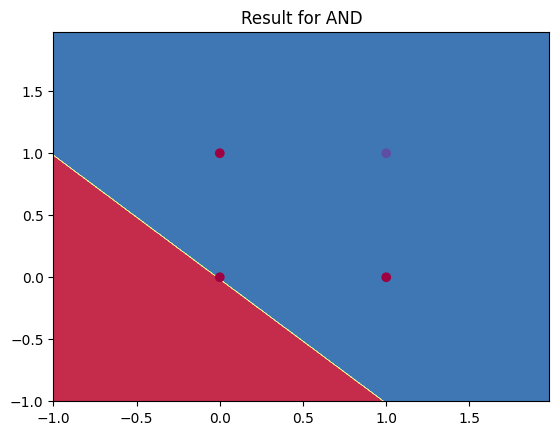

Truth Table
   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       0          0
2       1       0       0          0
3       1       1       1          1


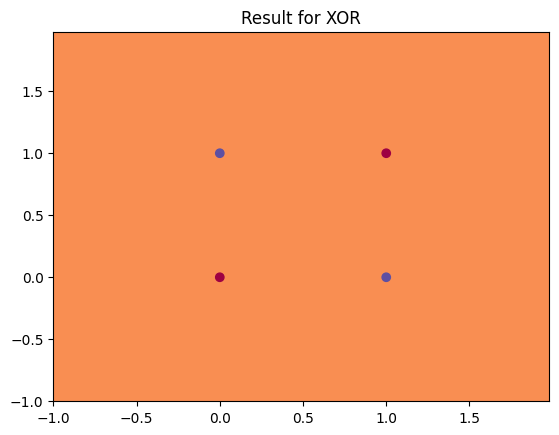

Truth Table
   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       1          0
2       1       0       1          0
3       1       1       0          0


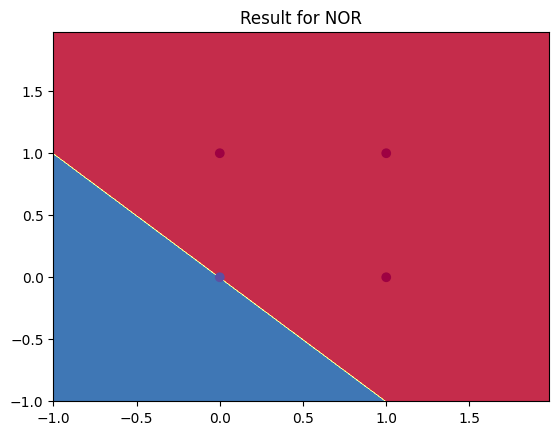

Truth Table
   input1  input2  actual  predicted
0       0       0       1          1
1       0       1       0          0
2       1       0       0          0
3       1       1       0          0


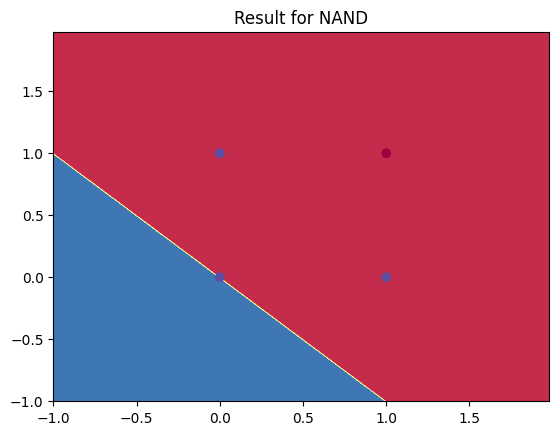

Truth Table
   input1  input2  actual  predicted
0       0       0       1          1
1       0       1       1          1
2       1       0       1          1
3       1       1       0          0


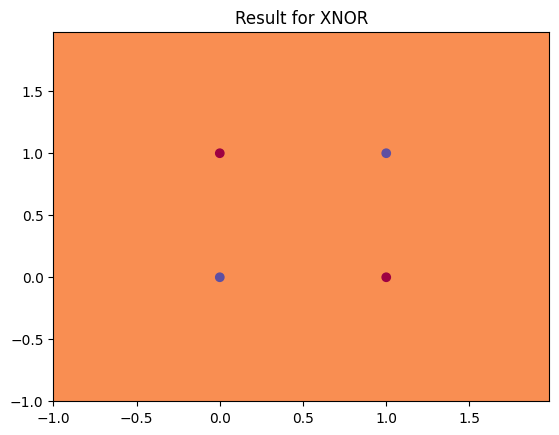

Truth Table
   input1  input2  actual  predicted
0       0       0       1          0
1       0       1       0          0
2       1       0       0          0
3       1       1       1          0


In [203]:
np.random.seed(42)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
GATES = {
    "OR": [0, 1, 1, 1],
    "AND": [0, 0, 0, 1],
    "XOR": [0, 1, 1, 0],
    "NOR": [1, 0, 0, 0],
    "NAND": [1, 1, 1, 0],
    "XNOR": [1, 0, 0, 1],
}


for gate in GATES:
   y = np.array([GATES[gate]]).T
   result = neural_network(X, y, learning_rate=0.1, activation_function=sigmoid)
   visualize_results(X, y, result, title=f"Result for {gate}")
   print(f'Truth Table')
   print(get_df(X, GATES[gate], result['output']))

